# seaborn is a standalone data visualization package that provides many extremely valuable data visualizations in a single package. It is generally a much more powerful tool than pandas

In [6]:
import pandas as pd
import seaborn as sns
reviews = pd.read_csv(r"C:\Users\User\Documents\wine\wine150k.csv", index_col = 0)
reviews.head(3)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


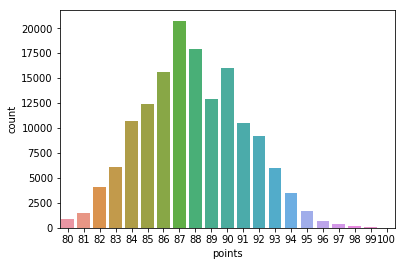

In [7]:
sns.countplot(reviews['points'])

### seaborn doesn't require us to shape the data for it via value_counts; the countplot (true to its name) aggregates the data for us. seaborn doesn't have a direct analogue to the line or area chart. Instead, the package provides a kdeplot

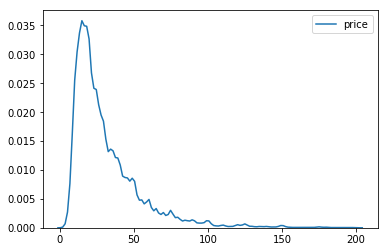

In [9]:
sns.kdeplot(reviews.query('price < 200').price)

#### KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip. 

#### A KDE plot is better than a line chart for getting the "true shape" of interval data. In fact, I recommend always using it instead of a line chart for such data. Else you would get the line graph like below. 


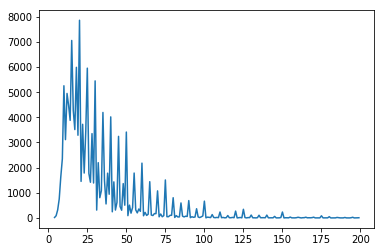

In [10]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


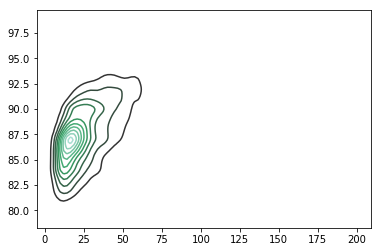

In [11]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

## Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data overplotting issue that scatter plots suffer from and hex plots address, in a different but similarly visually appealing

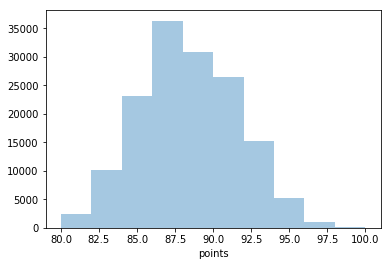

In [15]:
sns.distplot(reviews['points'], bins = 20, kde = False)

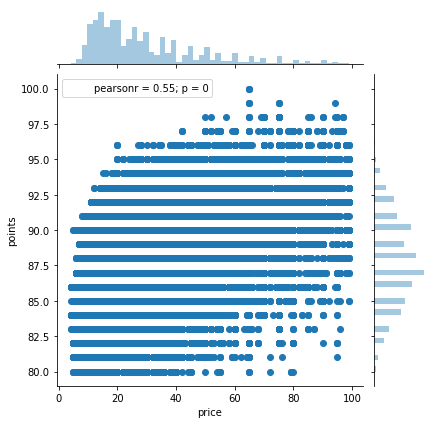

In [16]:
sns.jointplot(x = 'price', y = 'points', data = reviews[reviews['price'] < 100])

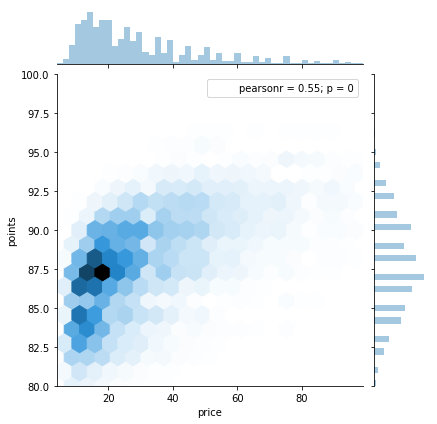

In [17]:
sns.jointplot(x = 'price', y = 'points', data = reviews[reviews['price'] < 100], kind = 'hex', gridsize = 20)

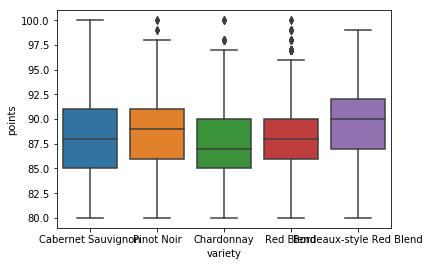

In [20]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index )]

sns.boxplot(x = 'variety', y = 'points', data = df)

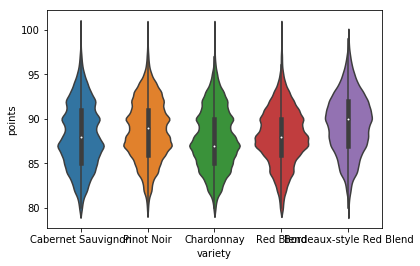

In [25]:
sns.violinplot( x = 'variety', y = 'points', data = reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)])

The majority of the simple data that gets generated is created in this format, and data that isn't can almost always be converted over. This is known as a "tidy data" format.

seaborn is designed to work with this kind of data out-of-the-box, for all of its plot types, with minimal fuss. This makes it an incredibly convenient workbench tool.

pandas is not designed this way. In pandas, every plot we generate is tied very directly to the input data. In essence, pandas expects your data being in exactly the right output shape, regardless of what the input is.

Hence, in practice, despite its simplicity, the pandas plotting tools are great for the initial stages of exploratory data analytics, but seaborn really becomes your tool of choice once you start doing more sophisticated explorations.

Questions: Why might a kdeplot not work very well for ordinal categorical data?

- KDEPlots work by aggregating data into a smooth curve. This is great for interval data but doesn't always work quite as well for ordinal categorical data.

